In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
figsize=(16, 8)

In [396]:
palette=sns.dark_palette("seagreen", n_colors=3)[::-1]
sns.set_theme(palette=palette)

In [397]:
st_cpu = pd.DataFrame({
    "Runtime": ["Go", "Python", "Numba", "Nuitka-run", "Pypy", "Pypy",],
    "Case": ["Go 8B", "Python 250M", "Numba 250M", "Nuitka-run 250M", "Pypy 250M", "Pypy 300M",],
    "N_Iter_Str": ["8B", "250M", "250M", "250M", "250M", "300M",],
    "N_Iter": [ 8*10**9, 252*10**6, 252*10**6, 252*10**6, 252*10**6, 300*10**6, ],
    "Time": [ 2.11, 2.09, 1.62, 2.10, 1.6, 1.9, ],
    # "Time_round": [ 2, 2, 1, 2, 0.22, 2, ],
})

In [398]:
print(st_cpu.drop(columns=["N_Iter", "Case"]).to_markdown(index=False))

| Runtime    | N_Iter_Str   |   Time |
|:-----------|:-------------|-------:|
| Go         | 8B           |   2.11 |
| Python     | 250M         |   2.09 |
| Numba      | 250M         |   1.62 |
| Nuitka-run | 250M         |   2.1  |
| Pypy       | 250M         |   1.6  |
| Pypy       | 300M         |   1.9  |


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

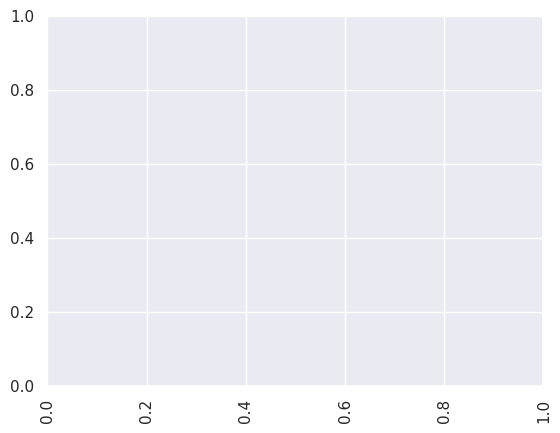

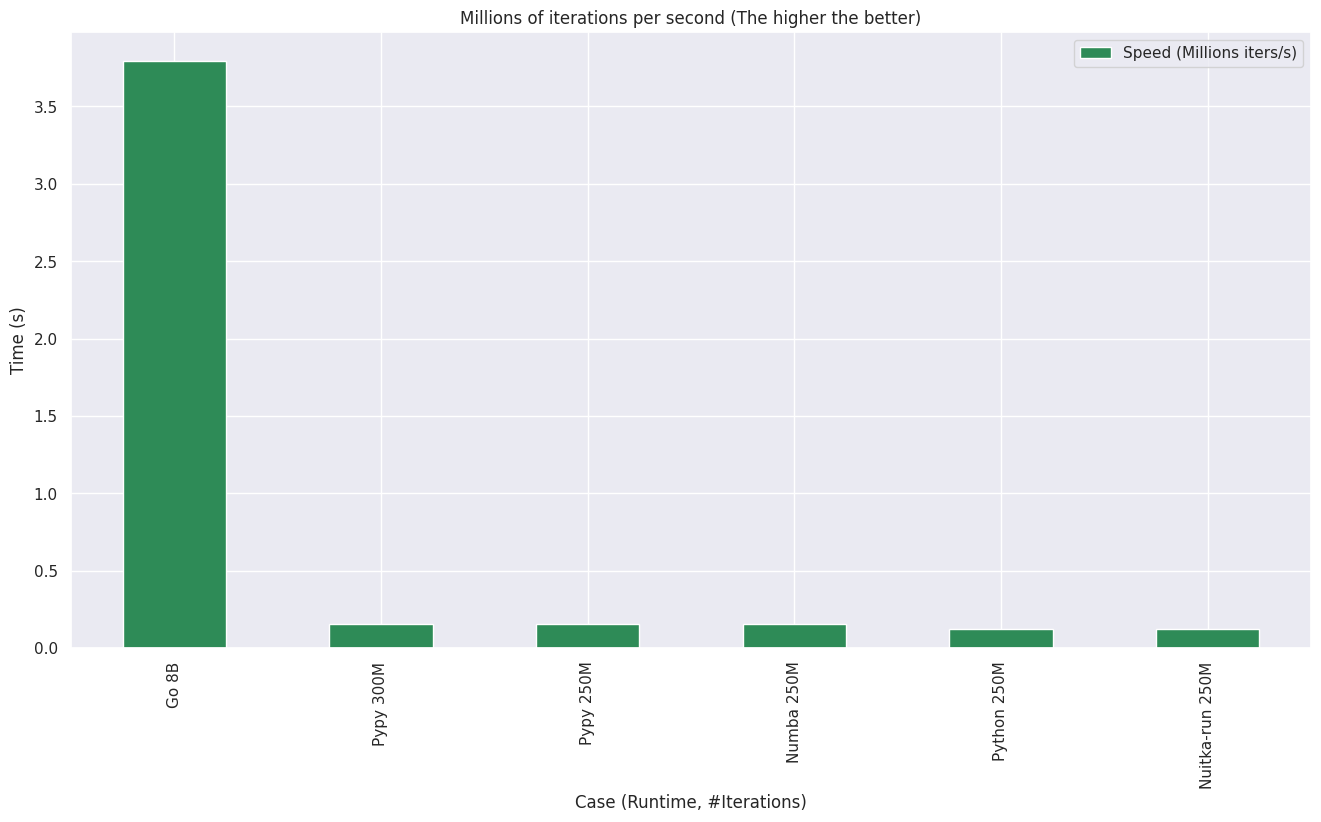

In [413]:
st_cpu.assign(
    **{"Speed (Millions iters/s)": lambda df_: df_["N_Iter"] / df_["Time"] / 1e9}
).sort_values("Speed (Millions iters/s)", ascending=False).set_index("Case").plot.bar(
    y="Speed (Millions iters/s)",
    xlabel="Case (Runtime, #Iterations)",
    ylabel="Time (s)",
    title="Millions of iterations per second (The higher the better)",
    figsize=figsize,
)
plt.savefig("sp-speed.png")

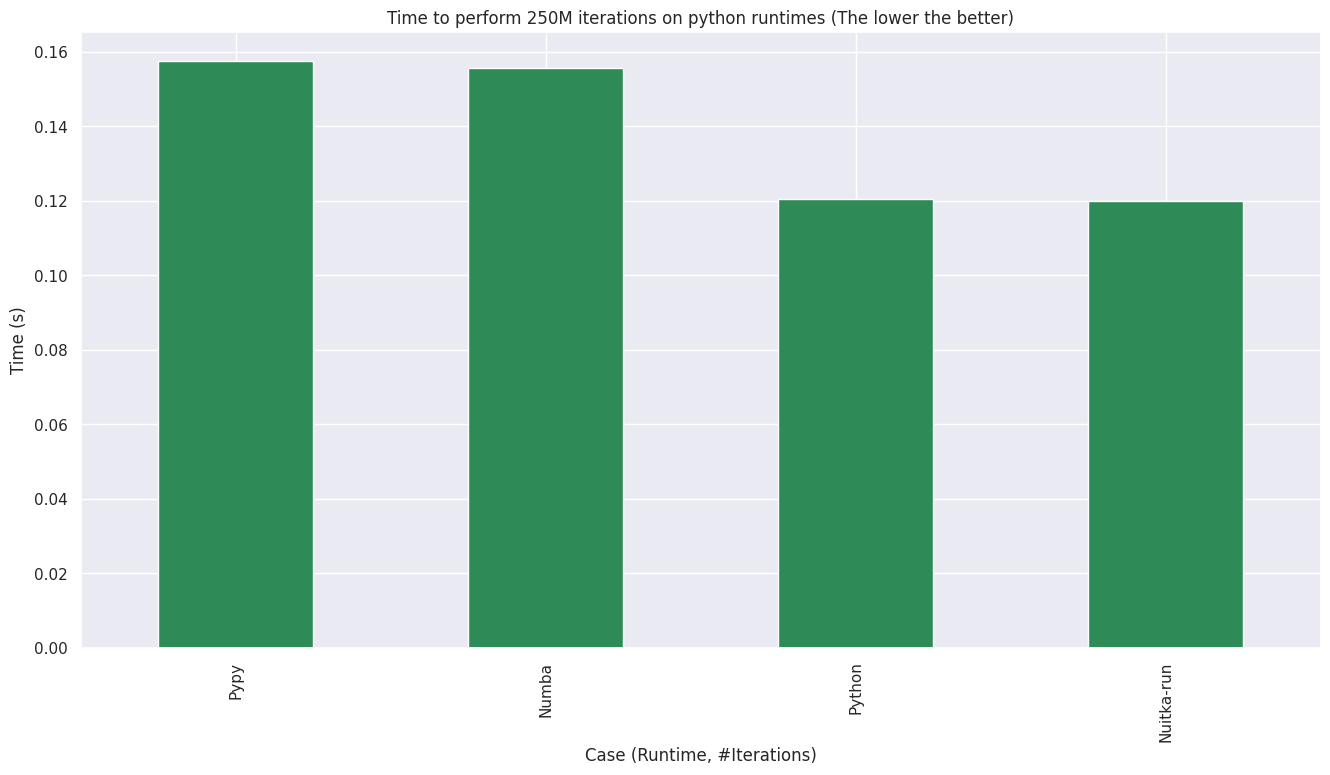

In [400]:
(
    st_cpu.loc[lambda df_: df_["Runtime"] != "Go"]
    .loc[lambda df_: df_["N_Iter"] == 252 * 10**6]
    .assign(
        **{"Speed (Millions iters/s)": lambda df_: df_["N_Iter"] / df_["Time"] / 1e9}
    )
    .set_index("Runtime")["Speed (Millions iters/s)"]
    .sort_values(ascending=False)
    .plot.bar(
        xlabel="Case (Runtime, #Iterations)",
        ylabel="Time (s)",
        title="Time to perform 250M iterations on python runtimes (The lower the better)",
        figsize=figsize,
    )
)
plt.savefig("python-sp-speed.png")

In [401]:

mp_res = pd.DataFrame({
    "nProc": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,],
    "Python": [ 100.77, 51.44, 35.21, 27.02, 21.71, 21.96, 20.67, 20.55, 19.93, 20.61, 20.29, 20.68, ],
    "Go": [ 102.75, 51.85, 35.40, 27.19, 21.47, 22.07, 21.78, 19.97, 20.38, 20.00, 19.70, 20.56, ],
}).assign(
    GoDiff=lambda df_:  -df_["Go"].diff() / df_["Go"].shift() * 100,
    PyDiff=lambda df_:  -df_["Python"].diff() / df_["Python"].shift() * 100,
)

In [402]:
print(mp_res.to_markdown(index=False))

|   nProc |   Python |     Go |    GoDiff |     PyDiff |
|--------:|---------:|-------:|----------:|-----------:|
|       1 |   100.77 | 102.75 | nan       | nan        |
|       2 |    51.44 |  51.85 |  49.5377  |  48.9531   |
|       3 |    35.21 |  35.4  |  31.7261  |  31.5513   |
|       4 |    27.02 |  27.19 |  23.1921  |  23.2604   |
|       5 |    21.71 |  21.47 |  21.0371  |  19.6521   |
|       6 |    21.96 |  22.07 |  -2.7946  |  -1.15154  |
|       7 |    20.67 |  21.78 |   1.314   |   5.87432  |
|       8 |    20.55 |  19.97 |   8.31038 |   0.580552 |
|       9 |    19.93 |  20.38 |  -2.05308 |   3.01703  |
|      10 |    20.61 |  20    |   1.86457 |  -3.41194  |
|      11 |    20.29 |  19.7  |   1.5     |   1.55264  |
|      12 |    20.68 |  20.56 |  -4.36548 |  -1.92213  |


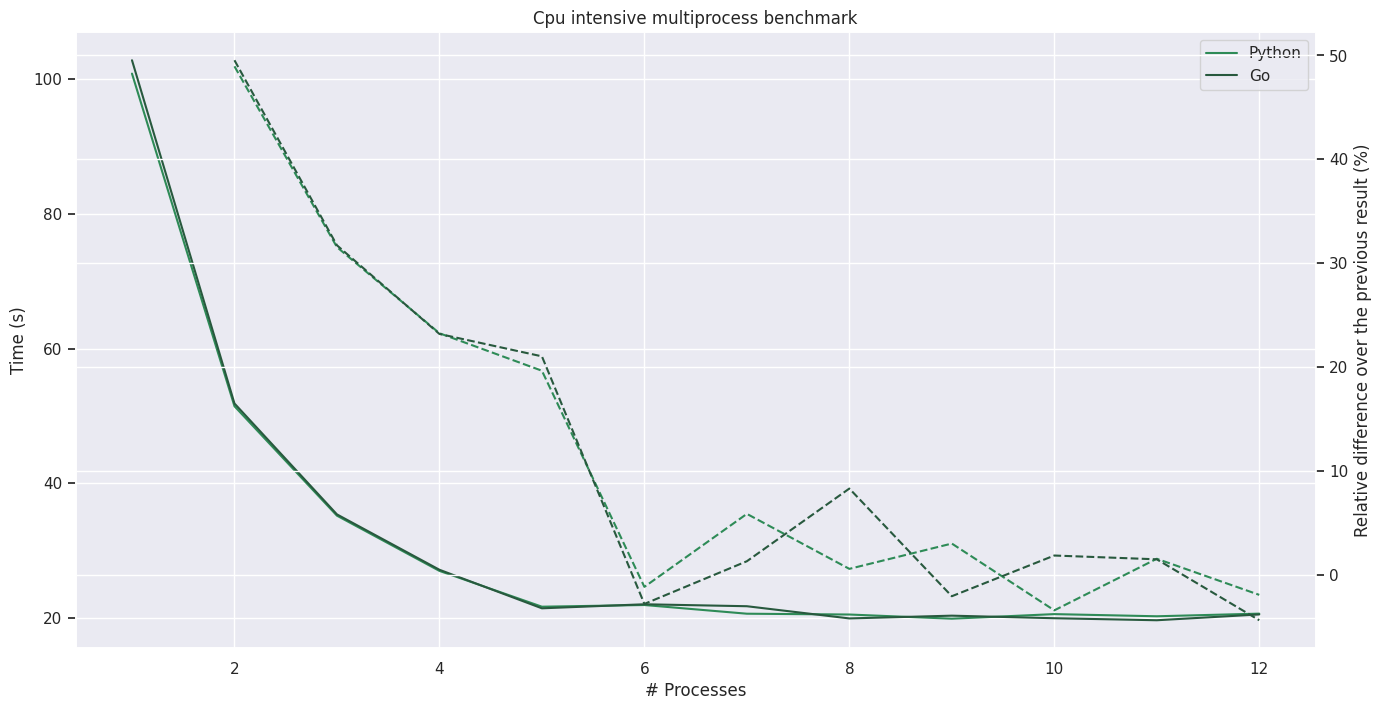

In [403]:
def mp_plot():
    ax = mp_res.set_index("nProc").plot.line(
        y="Python",
        ylabel="Time (s)",
        xlabel="# Processes",
        title="Cpu intensive multiprocess benchmark",
        figsize=figsize,
    )
    mp_res.set_index("nProc").plot.line(
        y="Go",
        ylabel="Time (s)",
        xlabel="# Processes",
        title="Cpu intensive multiprocess benchmark",
        figsize=figsize,
        ax=ax,
    )
    twinx = ax.twinx()
    mp_res.set_index("nProc").plot(
        y="PyDiff",
        ax=twinx,
        style="--",
        ylabel="Relative difference over the previous result (%)",
        legend=False,
    )
    mp_res.set_index("nProc").plot(y="GoDiff", ax=twinx, style="--", legend=False)
    return ax

mp_plot()
plt.savefig("mp-speed.png")

In [404]:
# ALL 50 TIMES
str_res = pd.DataFrame(
    {
        "Case": [
            "Python sp",
            "Python mp",
            "Go sp",
            "Go mp value",
            "Go mp reference",
        ],
        "Startup Time": [
            0.8060378390000551,
            0.8014833719989838,
            0.622168,
            0.605647,
            0.624730,
        ],
        "Total Time": [
            0.884513335,
            85.985173289 ,
            0.760111887,
            0.773528197,
            0.728803673,
        ],
    }
).assign(**{"Task Time": lambda df_: df_["Total Time"] - df_["Startup Time"]})
str_res

,Case,Startup Time,Total Time,Task Time
0,Python sp,0.806038,0.884513,0.078475
1,Python mp,0.801483,85.985173,85.183690
2,Go sp,0.622168,0.760112,0.137944
3,Go mp value,0.605647,0.773528,0.167881
4,Go mp reference,0.624730,0.728804,0.104074


In [405]:
print(str_res.to_markdown(index=False))

| Case            |   Startup Time |   Total Time |   Task Time |
|:----------------|---------------:|-------------:|------------:|
| Python sp       |       0.806038 |     0.884513 |   0.0784755 |
| Python mp       |       0.801483 |    85.9852   |  85.1837    |
| Go sp           |       0.622168 |     0.760112 |   0.137944  |
| Go mp value     |       0.605647 |     0.773528 |   0.167881  |
| Go mp reference |       0.62473  |     0.728804 |   0.104074  |


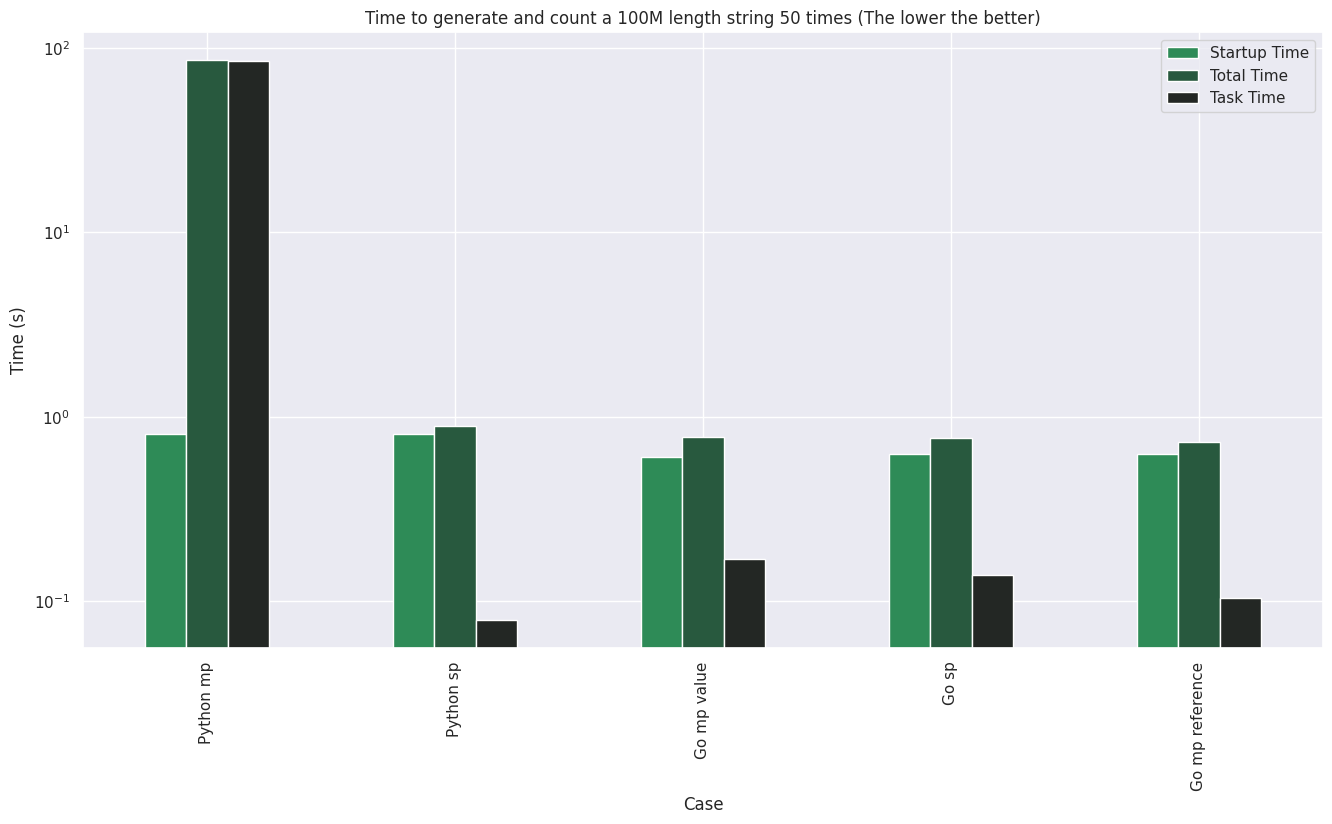

In [406]:
(
    str_res.set_index("Case")
    .sort_values("Total Time", ascending=False)
    .plot.bar(
        logy=True,
        ylabel="Time (s)",
        xlabel="Case",
        title="Time to generate and count a 100M length string 50 times (The lower the better)",
        figsize=figsize,
    )
)
plt.savefig("mp-string.png")

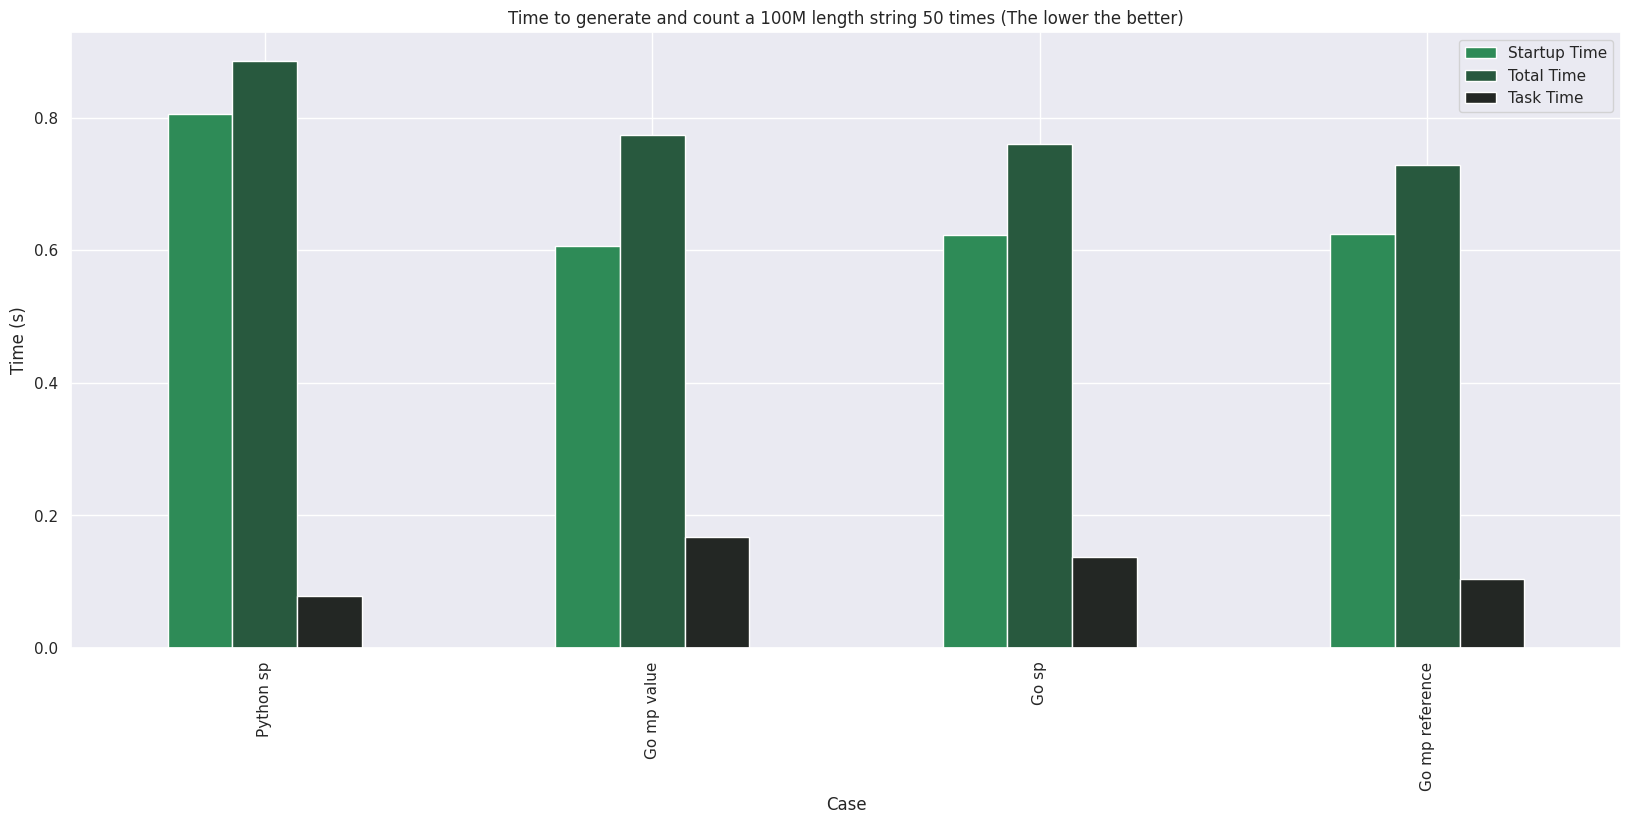

In [407]:
(
    str_res
    .loc[lambda df_: df_["Case"] != "Python mp"]
    .set_index("Case")
    .sort_values("Total Time", ascending=False)
    .plot.bar(
        ylabel="Time (s)",
        xlabel="Case",
        title="Time to generate and count a 100M length string 50 times (The lower the better)",
        figsize=(20, 8),
    )
)
plt.savefig("comp-mp-string.png")